<h1>
<font color="#ff2e2e">
Color Space Conversion
</font>
</h1>

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [21]:
# BGR color to be converted


# BGR to RGB
rgb = np.array([50,70,130])

# RGB to CMYK

k = np.round((1 - (np.max(rgb)/255)),2)
# c = (1 - rgb[0] - k) / (1 - k)
# m = (1 - rgb[1] - k) / (1 - k)
# y = (1 - rgb[2] - k) / (1 - k)
rgbn=np.round(rgb/255,2)
cmyk = 100*(np.ones(3,dtype=np.uint8) - k - rgbn)

print("BGR color:", rgb)
print("CMYK color:", cmyk)


BGR color: [ 50  70 130]
CMYK color: [31. 24.  0.]


<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [22]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> BGR to YCbCr </font></h3>

In [23]:
def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    #############
    result = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    # Display the YCbCr image
    # cv2.imshow('YCbCr Image', result)
    
    return result

<h3><font color = "#079e05"> BGR to HSV </font></h3>

In [24]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    #############
    result = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Display the HSV image
        
    return result

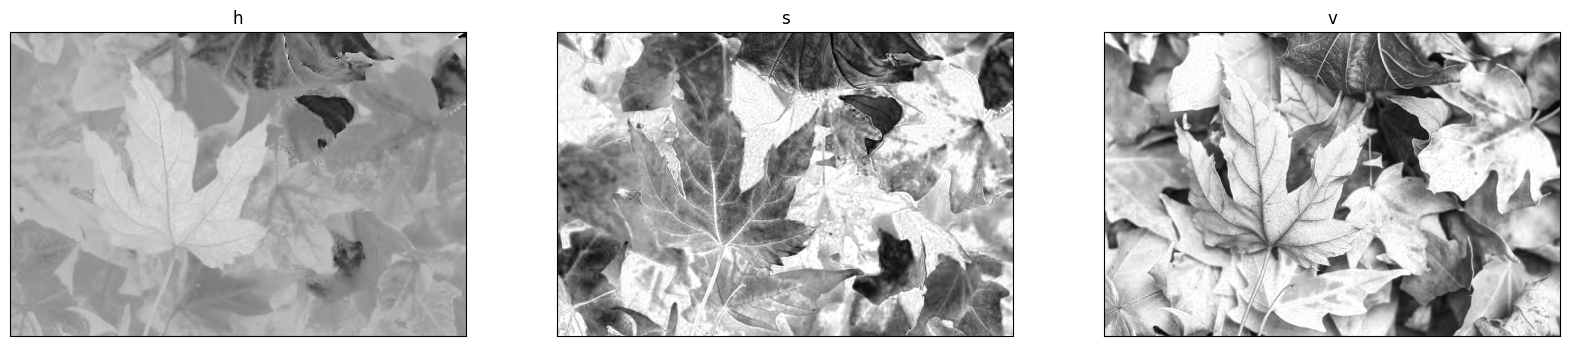

In [25]:

def showInEachChanal(img):
    # Load the image in BGR color space
    

    # Convert BGR to HSV
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Split the HSV image into three separate channels
    h_channel, s_channel, v_channel = cv2.split(hsv_img)
    image_list = [[h_channel, 'h', 'img'], [s_channel, 's', 'img'], [v_channel, 'v', 'img']]
    # Display each channel separately
    plotter(image_list,1 , 3, True, 20, 10, '2AA')

img = cv2.imread('./images/Q1/1.jpg')
showInEachChanal(img)

<h3><font color = "#079e05"> Show the result </font></h3>

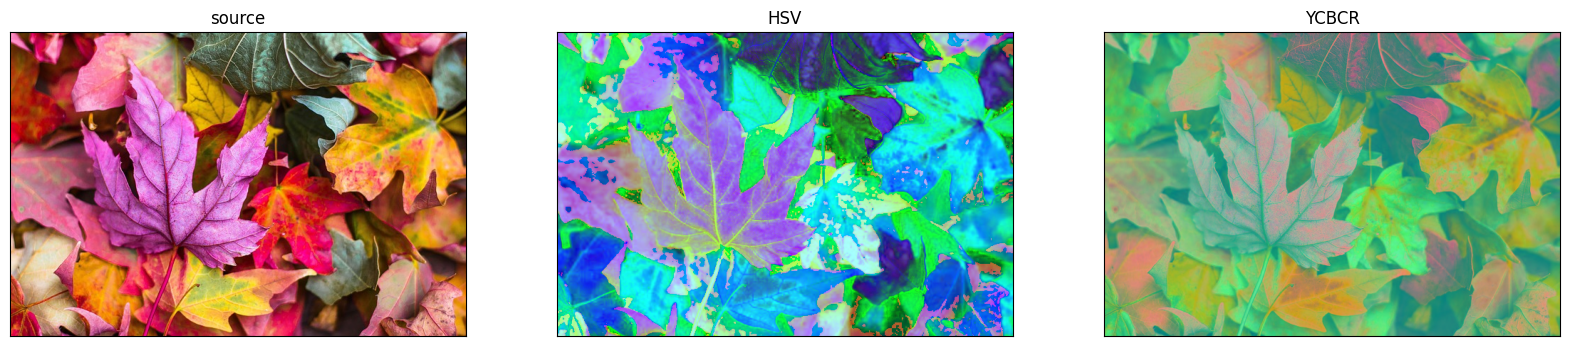

In [26]:
image_list = []
image = cv2.imread(os.path.join('images/Q1', '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCBCR', 'img'])
plotter(image_list,1 , 3, True, 20, 10, '2A')

<h1>
<font color="#ff2e2e">
Finding Differences
</font>
</h1>

In [32]:
def dif(image1, image2):
    '''
    Creates a new image that differences between two input images are shown.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result difference image.
    '''
    #############
    # Your code #
    #############
    result = np.zeros((916, 921, 3), dtype=np.uint8)
    result[:, :, 1] = image1[0:916, 0:921]
    result[:, :, 2] = image1[0: 916, 0:921]
    result[:, :, 0] = image2[0: 916, 0:921]
    
    return result

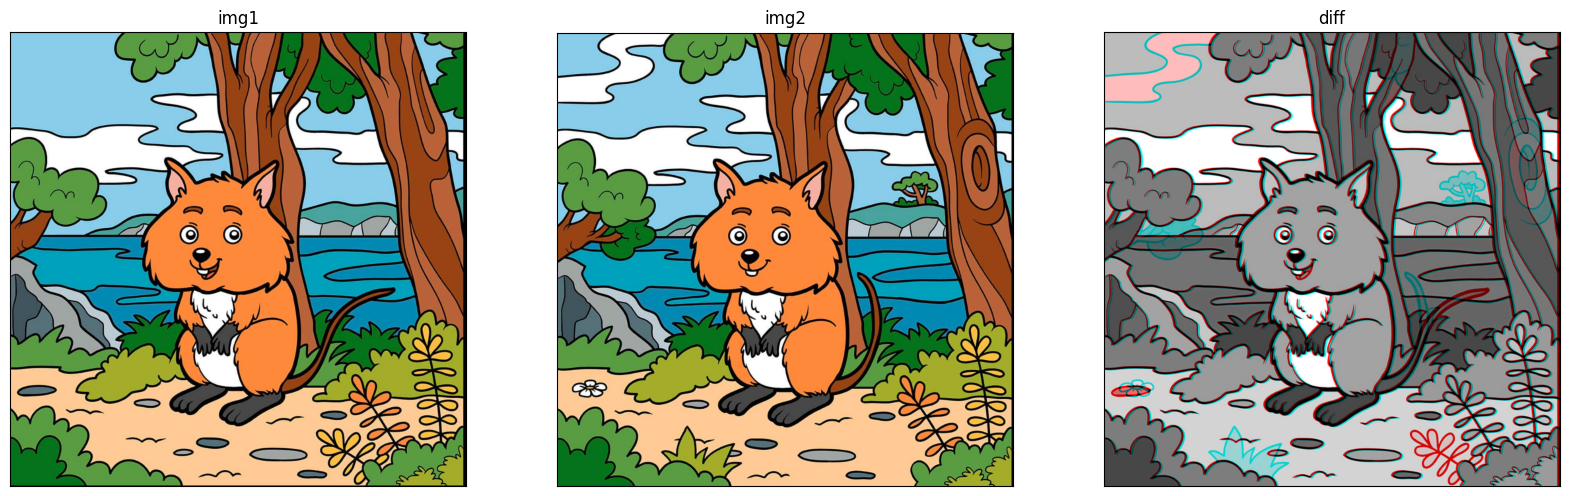

In [33]:
image_list = []

image1 = cv2.imread(os.path.join('images/Q1', '2.png'))
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join('images/Q1', '3.png'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])

image1 = cv2.imread(os.path.join('images/Q1', '2.png'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images/Q1', '3.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([dif(image1, image2), 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')